In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
data = pd.read_csv('../gun_violence_dataset/incidents_dataset.csv', index_col=0, parse_dates=['date'], infer_datetime_format=True)

# Delete rows with an average age above 100
data.drop(data[data.average_age >= 100].index, inplace=True)

data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,latitude,longitude,...,concealed carry license,assault weapon,lockdown/alert,tsa action,terrorism,ghost gun,political violence,mistaken id,nav,gun buy back action
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,40.3467,-79.8559,...,False,False,False,False,False,False,False,False,False,False
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,33.9090,-118.3330,...,False,False,False,False,False,False,False,False,False,False
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,41.4455,-82.1377,...,False,False,False,False,False,False,False,False,False,False
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,39.6518,-104.8020,...,False,False,False,False,False,False,False,False,False,False
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,36.1140,-79.9569,...,False,False,False,False,False,False,False,False,False,False


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231750 entries, 0 to 239676
Data columns (total 72 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   incident_id                                    231750 non-null  int64         
 1   date                                           231750 non-null  datetime64[ns]
 2   state                                          231750 non-null  object        
 3   city_or_county                                 231750 non-null  object        
 4   address                                        215572 non-null  object        
 5   n_killed                                       231750 non-null  int64         
 6   n_injured                                      231750 non-null  int64         
 7   congressional_district                         227719 non-null  float64       
 8   latitude                                    

In [46]:
data.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,average_age,n_victims,n_suspects,women_percentage
count,2.317500e+05,231750.000000,231750.000000,227719.000000,231750.000000,231750.000000,132316.000000,141344.000000,207409.000000,207409.000000,196144.000000
mean,5.516643e+05,0.246718,0.494218,8.001550,37.546598,-89.338220,1.378730,29.991040,0.898447,0.923287,10.695300
std,2.925567e+05,0.519151,0.731520,8.480999,5.130774,14.359515,4.792072,12.453042,0.842742,0.983398,25.102711
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.009188e+05,0.000000,0.000000,2.000000,33.903400,-94.158425,1.000000,21.000000,0.000000,0.000000,0.000000
50%,5.300465e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,27.000000,1.000000,1.000000,0.000000
75%,8.123112e+05,0.000000,1.000000,10.000000,41.437375,-80.048150,1.000000,36.000000,1.000000,1.000000,0.000000
max,1.083466e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,96.000000,102.000000,63.000000,100.000000


# Correlation between incidents

<AxesSubplot:>

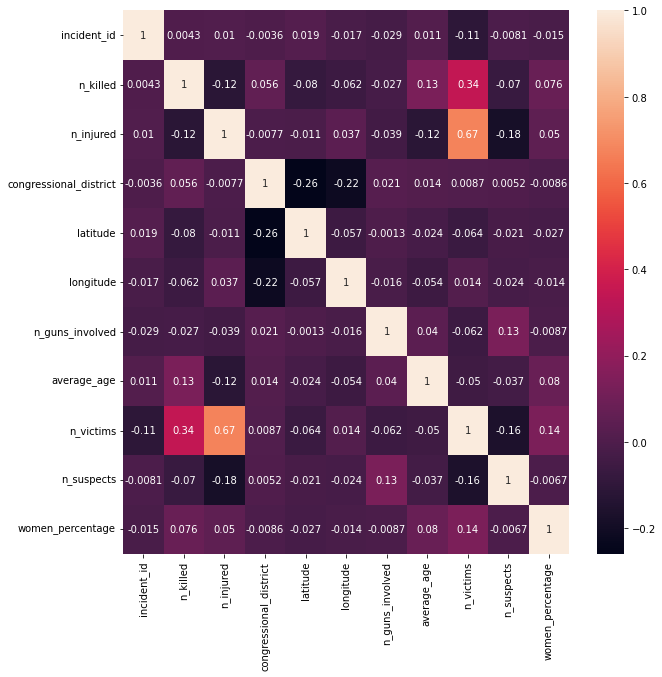

In [47]:
# Correlation matrix for numeric columns
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:>

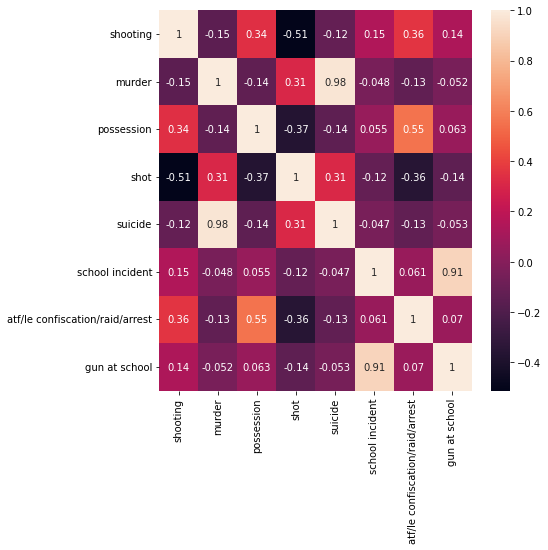

In [48]:
incident_columns = data.columns[18:]

for col in incident_columns:
    data[col] = data[col].astype(float)

# Correlation between incidents
high_corr = np.abs(data[incident_columns].corr()) >= 0.5
# Subtract identity matrix in order to remove the main diagonal
high_corr_nodiag = high_corr - np.eye(high_corr.shape[0])

subset = []
for i in range(high_corr_nodiag.shape[0]):
    if np.sum(high_corr_nodiag.to_numpy()[i, :]) != 0:
        subset.append(high_corr_nodiag.columns[i])

plt.figure(figsize=(7, 7))
sns.heatmap(data[subset].corr(), annot=True)

# These are the strongest correlations between incidents

# Distributions

<AxesSubplot:xlabel='women_percentage', ylabel='Density'>

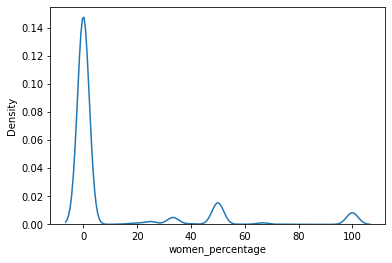

In [49]:
# Almost all of the incidents have no women involved
sns.kdeplot(data.women_percentage)

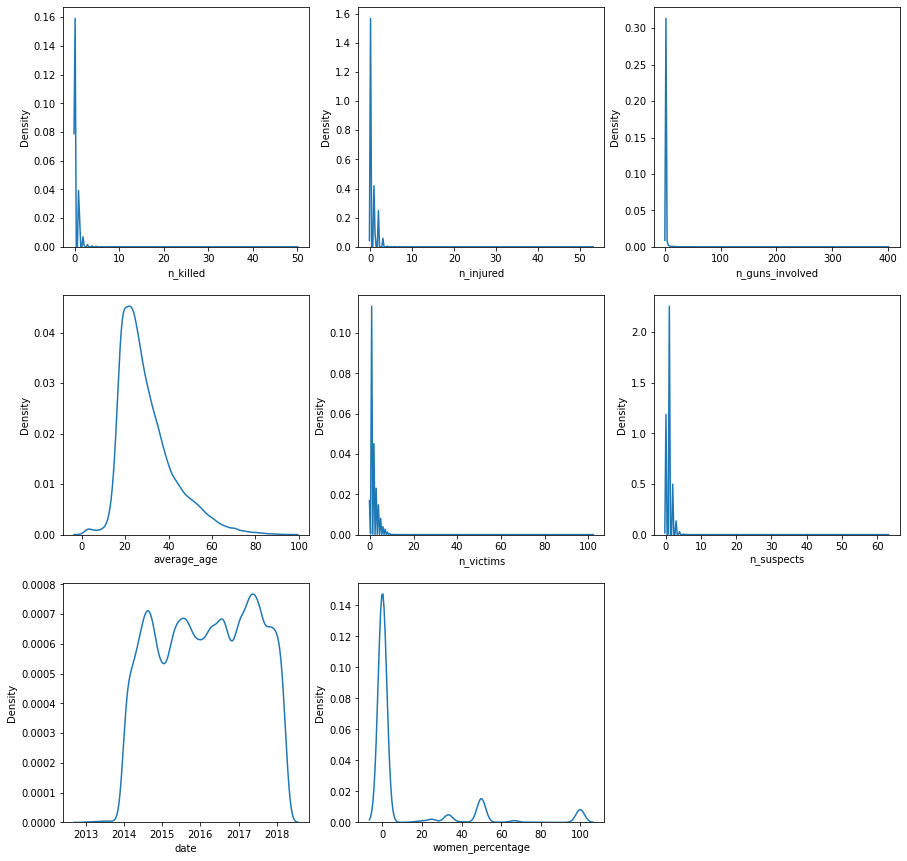

In [50]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(3, 3, 1)
sns.kdeplot(data.n_killed)

ax = fig.add_subplot(3, 3, 2)
sns.kdeplot(data.n_injured)

ax = fig.add_subplot(3, 3, 3)
sns.kdeplot(data.n_guns_involved)

ax = fig.add_subplot(3, 3, 4)
sns.kdeplot(data.average_age)

ax = fig.add_subplot(3, 3, 5)
sns.kdeplot(data.n_victims)

ax = fig.add_subplot(3, 3, 6)
sns.kdeplot(data.n_suspects)

ax = fig.add_subplot(3, 3, 7)
sns.kdeplot(data.date)

ax = fig.add_subplot(3, 3, 8)
sns.kdeplot(data.women_percentage)

plt.show()

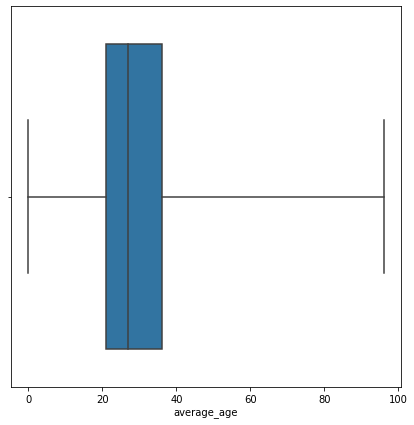

In [51]:
# Since the average age is the only one that has a good amplitude of common values, we just show the boxplot for this column
# We assume it makes no sense to plot the date
fig = plt.figure(figsize=(7, 7))
sns.boxplot(x=data.average_age, whis=20)
plt.show()

C:\Users\Vanessa\AppData\Local\Temp\ipykernel_8028\1433650779.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months)
C:\Users\Vanessa\AppData\Local\Temp\ipykernel_8028\1433650779.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(days_of_week)


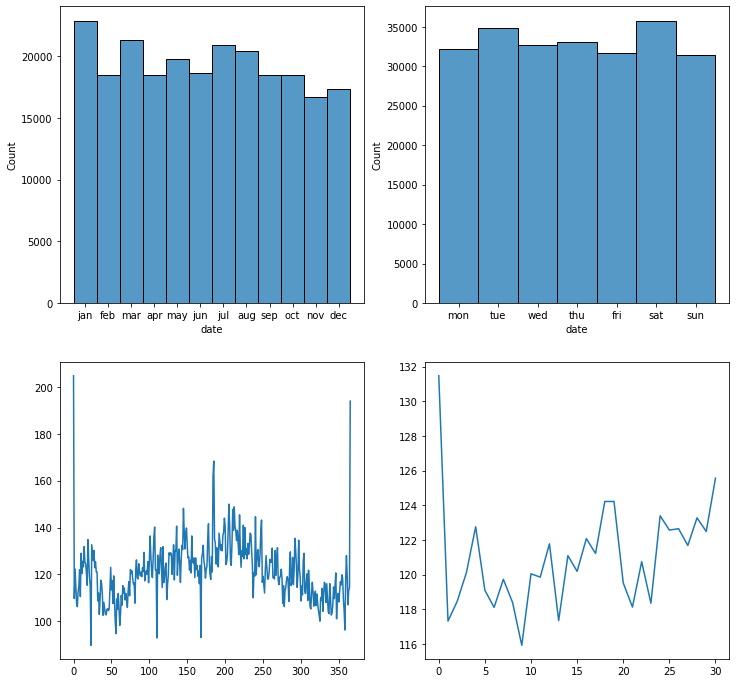

In [95]:
# Temporal Series
# We combine every year to get a decomposition of the months when the incidents happen

days_of_week = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(2, 2, 1)
ax.set_xticklabels(months)
sns.histplot(data.date.dt.month.apply(lambda y: months[y - 1]))

ax = fig.add_subplot(2, 2, 2)
ax.set_xticklabels(days_of_week)
sns.histplot(data.date.dt.day_of_week.apply(lambda y: days_of_week[y - 1]))

# We get the count of all the days of the year in the range of our dataset
all_year_days = pd.date_range(data.date.min(), data.date.max(), freq='D').day_of_year.value_counts()

# We weight each count by how much it is represented in the data range of the dataset
abs_frequencies = data.date.dt.day_of_year.value_counts()
scaled_year_frequencies = abs_frequencies / all_year_days

# Grouped in order to have a better visual representation
ax = fig.add_subplot(2, 2, 3)
plt.plot(scaled_year_frequencies.array)

# We get the count of all the days of the month in the range of our dataset
all_month_days = pd.date_range(data.date.min(), data.date.max(), freq='D').day.value_counts()

# We weight each count by how much it is represented in the data range of the dataset
abs_frequencies = data.date.dt.day.value_counts()
scaled_month_frequencies = abs_frequencies / all_month_days

# Plot the line that represents the weighted mean number of cases reported by day of month
ax = fig.add_subplot(2, 2, 4)
plt.plot(scaled_month_frequencies.array)

plt.show()

Tendency: -0.0005096390246555954 0.18263167730910823 110.70625673673193


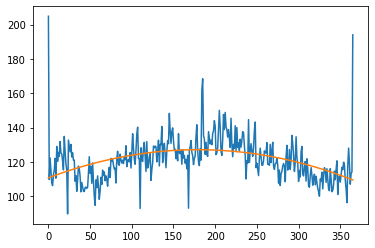

In [124]:
# As we see in the previous plot for the day of the year, there seems to be a slight parabolic tendency in criminality as the year passes
# We can see the distribution of the values using the plot above

year_freqs = scaled_year_frequencies.array

a, b, c = np.polyfit(np.arange(len(year_freqs)), year_freqs, 2)

x = np.linspace(0, 365, 100)
y = a*x**2 + b*x + c

plt.plot(year_freqs)
plt.plot(x, y)

# The blue line represents the actual number of cases per year day
# The orange line represents the regression parabola of the number of cases. We can see that at the middle of the year there is a slight
# increase in the number of reported cases

# Multi-variable analysis

In [132]:
# We study the mean age of the participants with respect to whether or not there was a gun at a school and whether the incidents happened at a school
data.pivot_table('average_age', 'gun at school', 'school incident', 'mean')

# We can see a sensible decrease in the mean age of the participants whenever there are schools involved. Mainly when there are also guns involved

school incident,0.0,1.0
gun at school,,
0.0,30.111323,22.076774
1.0,NaN,19.021769


In [136]:
# We study the mean ratio of women with respect to domestic violence and suicide incidents
data.pivot_table('women_percentage', 'domestic violence', 'suicide', 'mean')

# There seems to be more women involved in domestic violence related incidents, also there are more women in the suicide category when this happens
# As the last observation suicide rates seems to be almost the same when there is no domestic violence involved

suicide,0.0,1.0
domestic violence,,
0.0,9.603922,9.657139
1.0,25.740396,36.241708
